In [29]:
import lovelyplots
import matplotlib.pyplot as plt
plt.style.use('ipynb')
import wandb

In [30]:
accuracies = {}
steps = {}
for run in wandb.Api().runs("symphony-generation/price_of_freedom"):
    if "[tetris-camera-ready]" in run.tags:
        tensor_product_type = run.config["tensor_product"]["type"]
        hidden_lmax = run.config["hidden_lmax"]

        history = run.scan_history()
        accuracies[(tensor_product_type, hidden_lmax)] = [x["accuracy"] for x in history]
        steps[(tensor_product_type, hidden_lmax)] = [x["step"] for x in history]

/var/folders/rf/gl_bs24d2sg1ptcd__f19_pw0000gn/T/ipykernel_34983/941855298.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Reds")(hidden_lmax/5)
/var/folders/rf/gl_bs24d2sg1ptcd__f19_pw0000gn/T/ipykernel_34983/941855298.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Blues")(hidden_lmax/5)
/var/folders/rf/gl_bs24d2sg1ptcd__f19_pw0000gn/T/ipykernel_34983/941855298.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.

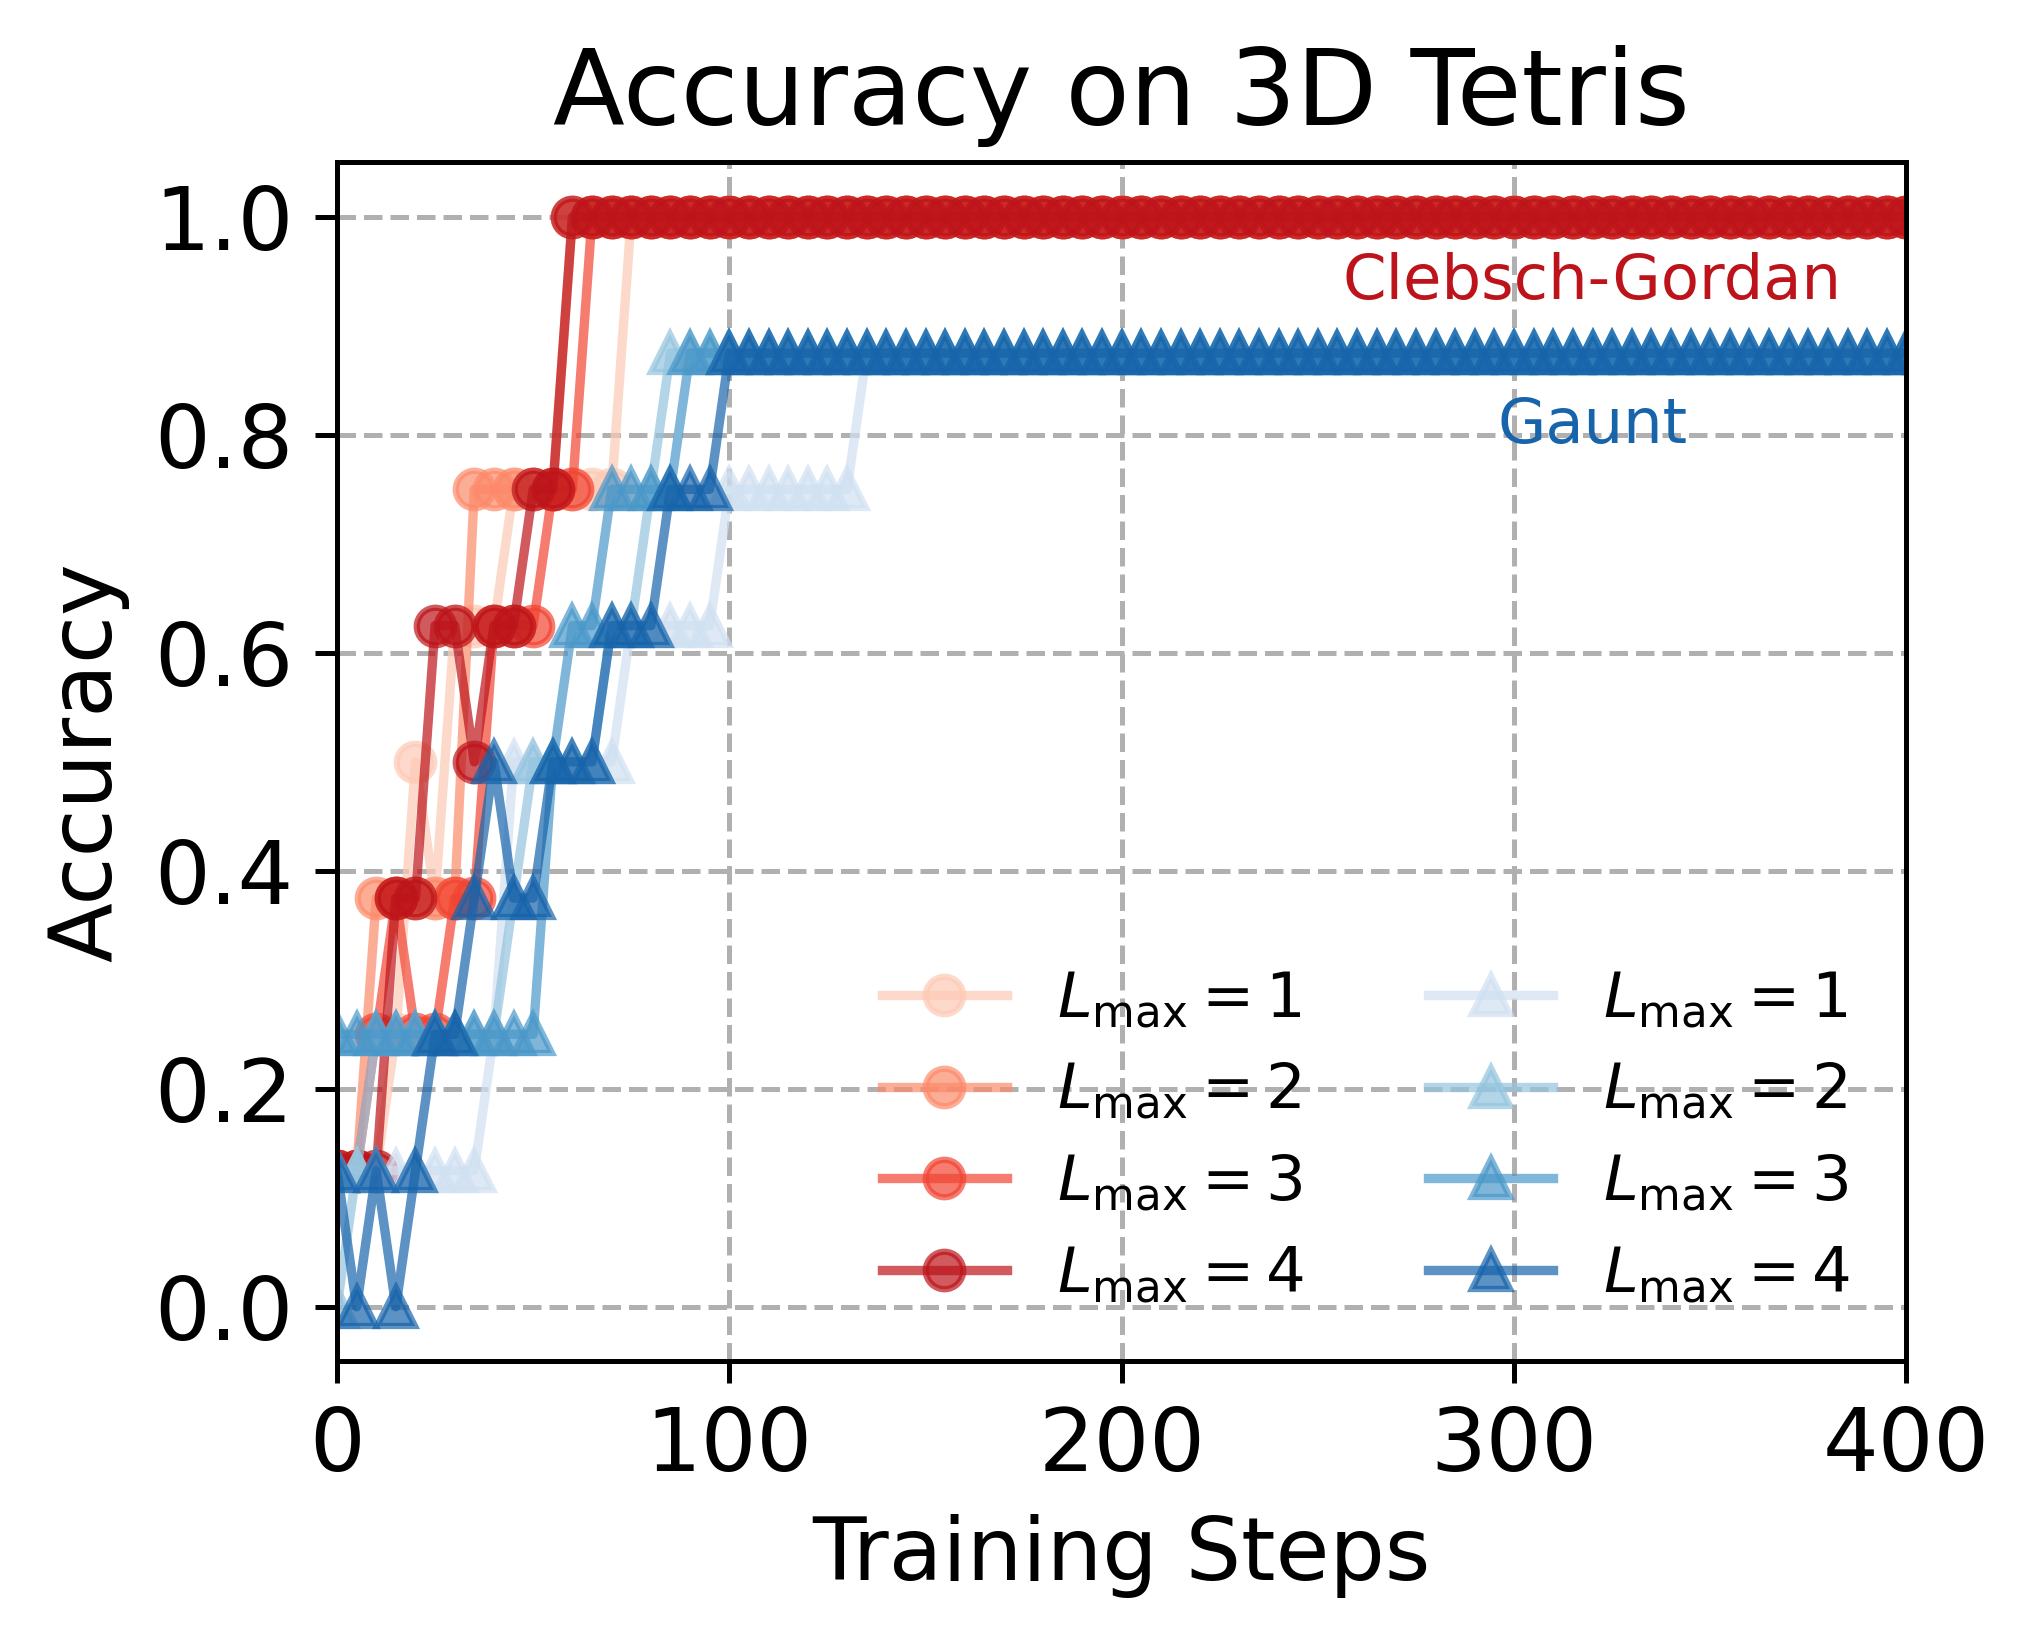

In [32]:
# Plot the accuracies
fig, ax = plt.subplots()
for (tensor_product_type, hidden_lmax) in sorted(accuracies.keys()):
    accs = accuracies[(tensor_product_type, hidden_lmax)]
    step = steps[(tensor_product_type, hidden_lmax)]
    if tensor_product_type == "gaunt-s2grid":
        color = plt.cm.get_cmap("Blues")(hidden_lmax/5)
        marker = "^"
    elif tensor_product_type == "clebsch-gordan-dense":
        color = plt.cm.get_cmap("Reds")(hidden_lmax/5)
        marker = "o"
    else:
        raise ValueError(f"Unknown tensor product type {tensor_product_type}")
    ax.plot(step, accs, label=r"$L_\text{max}=%d$" % hidden_lmax, color=color, alpha=0.7, marker=marker)

ax.text(0.8, 0.78, "Gaunt", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, color=plt.cm.get_cmap("Blues")(4/5))
ax.text(0.8, 0.9, "Clebsch-Gordan", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, color=plt.cm.get_cmap("Reds")(4/5))
ax.ticklabel_format(style='plain')
ax.set_xlabel("Training Steps")
ax.set_ylabel("Accuracy")
ax.grid(linestyle='--')
ax.set_title("Accuracy on 3D Tetris")
ax.legend(ncol=2, fontsize=10)
ax.set_xlim(0, 400)
plt.savefig("misc/tetris-results.pdf")
plt.show()